# **Task 20 - (Article 117)** [![Static Badge](https://img.shields.io/badge/Open%20in%20Colab%20-%20orange?style=plastic&logo=googlecolab&labelColor=grey)](https://colab.research.google.com/github/sshrizvi/DS-Python/blob/main/Pandas/Tasks/task_20.ipynb)

|🔴 **WARNING** 🔴|
|:-----------:|
|If you have not studied article 117. Do checkout the articles before attempting the task.|
| Here is [Merging, Concatenating and Joining](../Articles/117_merging.md) |

### 📦 **Importing Relevant Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ⚠️ **Data Warning**
For the questions forward, we are going to use `quarter-1.csv`, `quarter-2.csv`, `quarter-3.csv` and `items-only.csv` datasets, which is in the [Resources](../Resources/) folder.

**DATA DESCRIPTION**

|File Name | Columns | 
|:------:|:------:|
|quater-1.csv | ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']|
|quater-2.csv | ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']|
|quater-3.csv | ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']|
|items.csv | ['item_id', 'item_name']|


Dataset : [Link](https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link)

#### **Reading Data into DataFrames**

In [2]:
q1 = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/quarter-1.csv'
)

In [3]:
q2 = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/quarter-2.csv'
)

In [4]:
q3 = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/quarter-3.csv'
)

In [5]:
items = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/items-only.csv'
)

In [6]:
items_price = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/items.csv'
)

### **🎯 Q1 to Q4 - Quarter-Wise Sales Analysis**  

1. **📌 Merge Quarterly Data:**  
   - You are given **three quarter files**. Your first task is to **append these files** and create a **single DataFrame**.  
   - Each quarter's data should have an **index label**:  
     - `"Q-1"` for Quarter 1  
     - `"Q-2"` for Quarter 2  
     - `"Q-3"` for Quarter 3  

2. **📌 Identify Most Sold Items (Per Quarter):**  
   - You are provided with an **items-only.csv** file, which contains `item_id` and `item_name`.  
   - Use this file to **map item IDs to their names**.  
   - Find **the most sold item in each quarter** based on the total quantity sold.  

3. **📌 Identify Highest Revenue-Generating Items (Per Quarter):**  
   - **Revenue Calculation:** `Revenue = Quantity Sold × Item Price`  
   - Find out which **item generated the highest revenue** in each quarter.  

4. **📌 Compute Average Order Price (Per Quarter):**  
   - Calculate the **average order price** for each quarter.  
   - **Note:** The `item_price` column is given as a **string with a `$` sign**. Convert it to **rupees** before performing calculations.  

5. **Notes:**  
   - **Convert `item_price` to rupees** before performing any calculations.  
   - **Each quarter's data should remain separate**, so ensure grouping by the quarter index.  
   - **Sort results properly** (e.g., highest sold items and revenue should be ranked correctly).

**Converting Dollar to Indian Rupees**

In [7]:
def dollar_to_inr(dollar):
    if isinstance(dollar, str):
        dollar = float(dollar[1:])
    return dollar * 85.39 

In [8]:
q1.item_price = q1.item_price.apply(
    func = dollar_to_inr
)
q2.item_price = q2.item_price.apply(
    func = dollar_to_inr
)
q3.item_price = q3.item_price.apply(
    func = dollar_to_inr
)

**1. Merge Quarterly Data**  

In [9]:
year_data = pd.concat(
    objs = [
        q1, 
        q2,
        q3
    ],
    keys = [
        'Q1',
        'Q2',
        'Q3'
    ]
)
year_data

C:\Users\Abbas\AppData\Local\Temp\ipykernel_4468\322776325.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  year_data = pd.concat(


order_id quantity item_id choice_description_id  item_price
Q1 0           1        1       1                     1    289.4721
   1           1        1       2                     2    289.4721
   2           2        2       4                     3   1449.9222
   3           4        1       7                     6    789.8575
   4           6        1       9                     8    747.1625
...          ...      ...     ...                   ...         ...
Q2 2342     1829        1      23                    92    960.6375
   2343     1830        1      23                  1043    960.6375
   2344     1832        1      10                   116    747.1625
   2345     1832        1       8                     0    379.9855
   2346     1834        1      20                   515    960.6375

[4622 rows x 5 columns]

**2. Identify Most Sold Items (Per Quarter)**  

In [10]:
year_data.loc['Q1'].groupby(
    by = 'item_id'
)['quantity'].sum().sort_values(
    ascending = False
).head(1).reset_index().merge(
    right = items,
    on = 'item_id'
)['item_name'][0] + ' is the most sold item in Quarter 1'

'Chicken Bowl is the most sold item in Quarter 1'

In [11]:
year_data.loc['Q2'].groupby(
    by = 'item_id'
)['quantity'].sum().sort_values(
    ascending = False
).head(1).reset_index().merge(
    right = items,
    on = 'item_id'
)['item_name'][0] + ' is the most sold item in Quarter 2'

'Chicken Bowl is the most sold item in Quarter 2'

**3. Identify Highest Revenue-Generating Items (Per Quarter)**  

In [12]:
items_price['item_price'] = items_price['item_price'].apply(
    func = dollar_to_inr
)

items_price = items_price.sort_values(
    by = [
        'item_name',
        'item_price'
    ],
    ascending = False
).drop_duplicates(
    subset = 'item_name',
    keep = 'first'
).merge(
    right = items,
    on = 'item_name'
)

temp = year_data.loc['Q1'].groupby(
    by = 'item_id'
)['quantity'].sum().reset_index().merge(
    right = items_price,
    on = 'item_id'
)

temp['item_sales'] = temp['quantity'] * temp['item_price']

temp.sort_values(
    by = 'item_sales',
    ascending = False
).head(1)['item_name']

4    Chicken Bowl
Name: item_name, dtype: object

In [13]:
temp = year_data.loc['Q2'].groupby(
    by = 'item_id'
)['quantity'].sum().reset_index().merge(
    right = items_price,
    on = 'item_id'
)

temp['item_sales'] = temp['quantity'] * temp['item_price']

temp.sort_values(
    by = 'item_sales',
    ascending = False
).head(1)['item_name']

4    Chicken Bowl
Name: item_name, dtype: object

In [14]:
year_data.loc['Q1'].item_price.mean()

np.float64(647.0118532307691)

In [15]:
year_data.loc['Q2'].item_price.mean()

np.float64(628.0429042607584)

### ⚠️ **Data Warning**
For the questions forward, we are going to use IPL Deliveries dataset, which is in the [Resources](../Resources/) folder.

#### **Reading Data into DataFrame**

In [16]:
deliveries = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/ipl_deliveries.csv'
)

In [17]:
ipl_matches = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/IPL_Matches_2008_2022.csv'
)

### 🎯 **Q5: Purple Cap Holder of Each IPL Season**

1. 📌 **Task:**
    Find the **Purple Cap holder** for **each IPL season** using the IPL dataset.

2. 🏏 **Conditions:**
   - Purple Cap is awarded to the **bowler with the most wickets** in a season.
   - If multiple bowlers have the **same number of wickets**, the bowler with the **lowest economy rate** should be selected.
   - Only consider valid dismissals as wickets (exclude run-outs and other non-bowler dismissals).
   - Use the following formula for **Economy Rate**:  
     $$
     \text{Economy} = \frac{\text{Runs Conceded}}{\text{Balls Bowled} / 6}
     $$

3. 📊 **Final Output DataFrame Should Include:**
   - `Season`
   - `Bowler Name`
   - `Wickets`
   - `Economy`

In [18]:
ipl = pd.merge(
    left = deliveries,
    right = ipl_matches,
    on = 'ID'
)

In [19]:
season_group = ipl.groupby(
    by = 'Season'
)

In [20]:
purple_cap_df = pd.DataFrame(
    columns = [
        'Season',
        'Bowler',
        'Wicket',
        'Economy'
    ]
)
for season, season_df  in season_group:
    bowler_group = season_df.groupby(
        by = 'bowler'
    )
    for bowler, bowler_df in bowler_group:
        wickets = bowler_df['isWicketDelivery'].sum()
        runs_conceded = bowler_df['total_run'].sum()
        total_balls = bowler_df.shape[0]
        economy = runs_conceded / (total_balls / 6)
        bowler_df = pd.DataFrame(
            data = [
                [
                    season,
                    bowler,
                    wickets,
                    economy
                ]
            ],
            columns = [
                'Season',
                'Bowler',
                'Wicket',
                'Economy'
            ]
        )
        purple_cap_df = pd.concat(
            objs = [purple_cap_df, bowler_df]
        )

purple_cap_df.sort_values(
    by = [
        'Wicket',
        'Economy'
    ],
    ascending = [False, True]
).drop_duplicates(
    subset = 'Season',
    keep = 'first',
    ignore_index = True
)

C:\Users\Abbas\AppData\Local\Temp\ipykernel_4468\2992741785.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  purple_cap_df = pd.concat(


,Season,Bowler,Wicket,Economy
0,2021,HV Patel,35,7.662050
1,2013,DJ Bravo,34,7.729592
2,2020/21,K Rabada,32,8.188406
3,2011,SL Malinga,30,5.939547
4,2012,M Morkel,30,7.187661
5,2022,YS Chahal,29,7.496503
6,2019,K Rabada,29,7.691275
7,2017,B Kumar,28,7.111111
8,2018,AJ Tye,28,7.801700
9,2015,DJ Bravo,28,8.185185


### 🎯 **Q6: Best Bowler in Death Overs**

1. 📌 **Task:**
    Identify the **best bowler in death overs** across all IPL matches using the IPL dataset.

2. 🏏 **Definition:**
   - **Death Overs:** Overs between **16 to 20** (inclusive).


3. 🧮 **Evaluation Criteria:**
   - The **bowler with the most number of wickets** in death overs.
   - In case of a **tie** on wickets:
     - Select the bowler with the **lowest economy rate**.


4. 🔢 **Economy Rate Formula:**
    $$
    \text{Economy} = \frac{\text{Runs Conceded}}{\text{Balls Bowled} / 6}
    $$

5. ✅ **Output Should Contain:**
   - `Bowler Name`
   - `Wickets in Death Overs`
   - `Economy in Death Overs`

In [21]:
death_overs_deliveries = ipl[ipl['overs'] >= 15]
bowler_group = death_overs_deliveries.groupby(
    by = 'bowler'
)

In [22]:
best_bowlers = pd.DataFrame(
    columns = [
        'Bowler',
        'Wicket',
        'Economy'
    ]
)

for bowler, bowler_df in bowler_group:
    wickets = bowler_df['isWicketDelivery'].sum()
    runs_conceded = bowler_df['total_run'].sum()
    total_balls = bowler_df.shape[0]
    economy = runs_conceded / (total_balls / 6)
    bowler_df = pd.DataFrame(
        data = [
            [
                bowler,
                wickets,
                economy
            ]
        ],
        columns = [
            'Bowler',
            'Wicket',
            'Economy'
        ]
    )
    best_bowlers = pd.concat(
        objs = [best_bowlers, bowler_df]
    )

best_bowlers.sort_values(
    by = [
        'Wicket',
        'Economy'
    ],
    ascending = [False, True]
)

C:\Users\Abbas\AppData\Local\Temp\ipykernel_4468\3762214176.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  best_bowlers = pd.concat(


,Bowler,Wicket,Economy
0,DJ Bravo,130,9.014354
0,SL Malinga,122,7.798978
0,B Kumar,95,8.801956
0,JJ Bumrah,90,8.309623
0,SP Narine,77,7.342268
...,...,...,...
0,P Ray Barman,0,20.000000
0,LPC Silva,0,21.000000
0,Ankit Soni,0,24.000000
0,DG Nalkande,0,36.000000


### 🎯 **Q7: Batsman Record Season-Wise**

1. 📌 **Task:**
    Write a function that returns a season-wise batting summary for a given batsman.

2. 🧠 **Function Requirements:**
    - Function **input**: `batsman_name` (string)
    - Function **output**: A `DataFrame` with the following columns:

    ```bash
        ['Season', 'Innings', 'TotalRuns', 'Avg', 'HighestScore', 'StrikeRate']
    ```

    - Set the **`Season` column as the index** of the resulting DataFrame.

3. 🧾 **Column Definitions & Rules:**
   - **Innings**: Count of distinct innings played by the batsman per season.
   - **TotalRuns**: Total runs scored by the batsman in that season.
   - **Avg (Average)**:  
     $$
     \text{Avg} = \frac{\text{Total Runs}}{\text{Number of times the batsman got out}}
     $$

   - **HighestScore**: Maximum score in a single innings.
   - **StrikeRate**:  
     $$
     \text{StrikeRate} = \left(\frac{\text{Total Runs}}{\text{Balls Faced}}\right) \times 100
     $$
     - **Balls faced rules:**
       - Do **not count** **wide balls** as faced.
       - **Count no balls** as valid deliveries.
       - Use the `extra_type` column to exclude `'wides'`.

4. ⚠️ **Important Considerations:**
   - A batsman can:
     - **Score runs** off **no balls**.
     - **Get out** on **no balls** and **wide balls**.
     - **Be dismissed** while at the **non-striker's end** (ensure you match the batsman correctly in dismissals).

In [23]:
def batsman_record(batsman_name, ipl):

    bat = ipl[ipl['batter'] == batsman_name].copy()

    bat['valid_ball'] = bat['extra_type'].fillna('') != 'wides'
    inns = (
        bat.groupby(['Season', 'ID', 'innings'])
           .agg(
               runs = ('batsman_run', 'sum'),
               balls = ('valid_ball', 'sum'),
               out   = ('player_out', lambda s: int((s == batsman_name).sum()))
           )
           .reset_index()
    )
    
    season_stats = inns.groupby('Season').agg(
        Innings      = ('innings', 'count'),
        TotalRuns    = ('runs', 'sum'),
        HighestScore = ('runs', 'max'),
        BallsFaced   = ('balls', 'sum'),
        Dismissals   = ('out', 'sum')
    )
    
    season_stats['Avg'] = np.where(
        season_stats['Dismissals'] > 0,
        season_stats['TotalRuns'] / season_stats['Dismissals'],
        season_stats['TotalRuns']
    )
    season_stats['StrikeRate'] = (season_stats['TotalRuns'] / season_stats['BallsFaced']) * 100
    
    return (
        season_stats
        .drop(columns=['BallsFaced','Dismissals'])
        .sort_index()
    )

In [24]:
batsman_record(
    batsman_name = 'MS Dhoni',
    ipl = ipl
)

,Innings,TotalRuns,HighestScore,Avg,StrikeRate
Season,,,,,
2007/08,14,414,65,41.400000,133.548387
2009,13,332,58,41.500000,127.203065
2009/10,11,287,66,31.888889,136.666667
2011,13,392,70,43.555556,158.704453
2012,17,358,51,32.545455,128.776978
2013,16,461,67,46.100000,162.897527
2014,15,371,57,74.200000,148.400000
2015,17,372,53,31.000000,121.967213
2016,12,284,64,40.571429,135.238095


### 🎯 **Q8: Player of the Match Performance Summary**

1. 📌 **Objective:**
    Using both datasets (match-level and ball-by-ball), create a DataFrame with the following columns:

    ```bash
    ['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']
    ```

2. 🧾 **Column Definitions:**

   1. **`PlayerOfThematch`**:
      - Name of the player who received the "Player of the Match" award for each match.

   2. **`BattingFigure`**:
      - Format: `<runs>/<balls>`
      - Total runs scored and balls faced by the Player of the Match in that match.
      - **Note**: Wide balls are **not** counted in balls faced.

   3. **`BowlingFigure`**:
      - Format: `<wickets>/<runs-conceded>`
      - Wickets taken and runs conceded by the player in that match if they bowled.
      - If the player did **not bowl**, the field should be `NaN`.

3. 🧠 **Rules & Considerations:**

   - Each row should correspond to one match.
   - Pull **batting and bowling performance** of the Player of the Match **only from that specific match**.
   - Use ball-by-ball data to:
     - Calculate runs and balls faced.
     - Compute wickets and runs conceded if the player bowled.
   - Do not include extras (like wides, leg-byes, etc.) in the **runs scored** by batsman.
   - Use `extra_type` column to filter wide balls out from ball count.

4. ✅ **Example Output Format:**

    | PlayerOfThematch | BattingFigure | BowlingFigure |
    |------------------|----------------|----------------|
    | V Kohli          | 112/76         | NaN            |
    | Rashid Khan      | 34/17          | 3/24           |


In [57]:
def batting_figure(batsman_name, match_deliveries):
    '''
    It Returns the batting figure of a batsman in a particular match.
    '''
    match_deliveries = match_deliveries[match_deliveries['batter'] == batsman_name].copy()
    match_deliveries['ValidBall'] = match_deliveries['extra_type'] != 'wides'
    total_runs = match_deliveries['batsman_run'].sum()
    balls_faced = match_deliveries['ValidBall'].sum()
    return f"{total_runs}/{balls_faced}" if balls_faced > 0 else np.nan

In [58]:
def bowling_figure(bowler_name, match_deliveries):
    '''
    It returns the bowling figure of a bowler in a particular match.
    '''
    match_deliveries = match_deliveries[match_deliveries['bowler'] == bowler_name]
    if match_deliveries.empty:
        return np.nan
    total_runs = match_deliveries['total_run'].sum()
    wickets = match_deliveries['isWicketDelivery'].sum()
    return f"{wickets}/{total_runs}"

In [62]:
ipl_df = ipl.copy()
matches_df = ipl_matches.copy()

match_group = ipl_df.groupby(
    by = 'ID'
)

potm_summary = pd.DataFrame()

for match_id, match_df in match_group:
    potm = matches_df[matches_df.ID == match_id]['Player_of_Match'].values[0]
    bat_fig = batting_figure(potm, match_df)
    bow_fig = bowling_figure(potm, match_df)
    potm_record = pd.DataFrame(
        data = [
            [
                potm,
                bat_fig,
                bow_fig
            ]
        ],
        columns = [
            'PlayerOfTheMatch',
            'BattingFigure',
            'BowlingFigure'
        ]
    )
    potm_summary = pd.concat(
        objs = [potm_summary, potm_record],
        ignore_index = True
    )

In [63]:
potm_summary.dropna(
    subset=['BattingFigure'],
    inplace=True
)

In [64]:
potm_summary

,PlayerOfTheMatch,BattingFigure,BowlingFigure
0,BB McCullum,158/73,NaN
1,MEK Hussey,116/54,NaN
3,MV Boucher,39/19,NaN
4,DJ Hussey,38/43,1/35
5,SR Watson,76/49,0/39
...,...,...,...
943,R Ashwin,40/23,1/28
946,DA Miller,68/38,NaN
947,RM Patidar,112/54,NaN
948,JC Buttler,106/60,NaN


### ⚠️ **Data Warning**
For the questions forward, we are going to use IRIS dataset, which is in the [Resources](../Resources/) folder.  



- **Sepal All:** [Link to Download](https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv)
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** [Link to Download](https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv)
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** [Link to Download](https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv)
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** [Link to Download](https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv)
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** [Link to Download](https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv)
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

#### **Reading Data into DataFrames**

In [30]:
sepal_all = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/sepal_all.csv'
)
sepal_all.drop(
    columns = 'Unnamed: 0',
    inplace = True
)

In [31]:
petal_all = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/petal_all.csv'
)
petal_all.drop(
    columns = 'Unnamed: 0',
    inplace = True
)

In [32]:
virginica = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/virginica.csv'
)
virginica.drop(
    columns = 'Unnamed: 0',
    inplace = True
)

In [33]:
versicolor = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/versicolor.csv'
)
versicolor.drop(
    columns = 'Unnamed: 0',
    inplace = True
)

In [34]:
setosa = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/setosa.csv'
)
setosa.drop(
    columns = 'Unnamed: 0',
    inplace = True
)

### 🎯 **Q9: Plotting Flower Feature Averages from Iris Dataset**

1. 📌 **Objective:**
    Generate a **bar chart** that compares the following two values from the Iris dataset:  
    1. **Average Sepal Length** of the *Virginica* species.  
    2. **Average Petal Length** of the *Setosa* species.

2. 📝 **Instructions:**
   - Use the Iris dataset.
   - Filter the dataset to:
     - Calculate the **mean Sepal Length** for all records where `species == "virginica"`.
     - Calculate the **mean Petal Length** for all records where `species == "setosa"`.
   - Plot a **bar chart** showing **both values**.
     - Label the bars appropriately (e.g., `"Virginica - Sepal Length"`, `"Setosa - Petal Length"`).
     - Add a meaningful **title**, and **label the axes**.

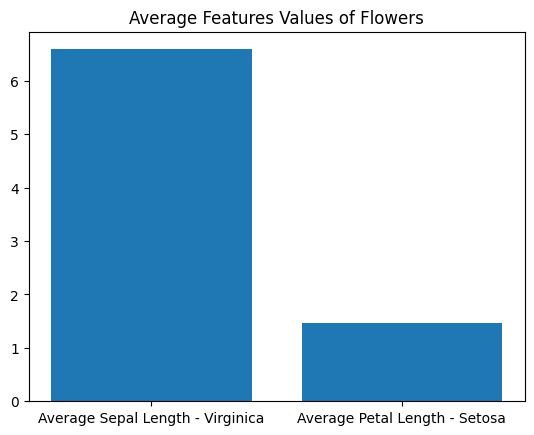

In [35]:
averages = np.array(
    object = [
        pd.merge(
            left = sepal_all,
            right = virginica,
            on = 'Id'
        )['SepalLengthCm'].mean(),
        pd.merge(
            left = petal_all,
            right = setosa,
            on = 'Id'
        )['PetalLengthCm'].mean()
    ]
)
labels = np.array(['Average Sepal Length - Virginica', 'Average Petal Length - Setosa'])
plt.bar(
    x = labels,
    height = averages
)
plt.title('Average Features Values of Flowers')
plt.show()

### 🎯 **Q10: Constructing the Complete Iris Dataset from Individual Subsets**

1. 📌 **Objective:**
Merge multiple datasets into one **complete, shuffled Iris dataset** with standardized column structure.

2. 🗂️ **Given Datasets:**

    You are provided with the following individual datasets:

    - `virginica`
    - `versicolor`
    - `setosa`
    - `sepal_all`
    - `petal_all`

2. 🛠️ **Tasks:**

   1. Combine all the given datasets to create a single, unified DataFrame.
   2. Ensure the final dataset has the following columns in the exact order:
      ```
      1. Id
      2. Species
      3. SepalLengthCm
      4. SepalWidthCm
      5. PetalLengthCm
      6. PetalWidthCm
      ```
   3. Shuffle the resulting DataFrame so that the `Id` values appear in a **random order**, not in increasing or decreasing sequence.
      - Use the `DataFrame.sample()` method for shuffling.
      - Make sure to **reset the index** after shuffling.

In [49]:
species = pd.concat(
    objs = [
        virginica,
        versicolor,
        setosa
    ]
)
iris_df = pd.merge(
    left = sepal_all,
    right = petal_all,
    on = 'Id',
    how = 'inner'
).merge(
    right = species,
    on = 'Id',
    how = 'inner'
).sample(
    n = 150,
    replace = False,
    random_state = 42
).reset_index().drop(columns = 'index')

iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,74,6.1,2.8,4.7,1.2,Iris-versicolor
1,19,5.7,3.8,1.7,0.3,Iris-setosa
2,119,7.7,2.6,6.9,2.3,Iris-virginica
3,79,6.0,2.9,4.5,1.5,Iris-versicolor
4,77,6.8,2.8,4.8,1.4,Iris-versicolor
...,...,...,...,...,...,...
145,72,6.1,2.8,4.0,1.3,Iris-versicolor
146,107,4.9,2.5,4.5,1.7,Iris-virginica
147,15,5.8,4.0,1.2,0.2,Iris-setosa
148,93,5.8,2.6,4.0,1.2,Iris-versicolor


### 🎯 **Q11: Analyze Sepal and Petal Width Ranges for Setosa and Versicolor**

1. 📌 **Objective:**
    Identify the **minimum and maximum values** of *Sepal Width* and *Petal Width* for the **Setosa** and **Versicolor** species using grouping and aggregation.

2. 🛠️ **Instructions:**

   1. **Merge the Required Datasets:**
      - Combine datasets related to Setosa and Versicolor into a single DataFrame.

   2. **Group the Data:**
      - Use the `groupby()` function to create groups based on the `"Species"` column.

   3. **Extract Key Statistics:**
      - For each group (Setosa and Versicolor), compute:
        - **Minimum Sepal Width**
        - **Maximum Sepal Width**
        - **Minimum Petal Width**
        - **Maximum Petal Width**

3. ✅ **Expected Output Format:**

    ```bash
    Minimum Sepal width of Setosa is 2.3
    Maximum Sepal width of Setosa is 4.4

    Minimum Petal width of Setosa is 0.1
    Maximum Petal width of Setosa is 0.6

    Minimum Sepal width of Versicolor is 2.0
    Maximum Sepal width of Versicolor is 3.4

    Minimum Petal width of Versicolor is 1.0
    Maximum Petal width of Versicolor is 1.8
    ```

In [51]:
species = pd.concat(
    objs = [
        setosa,
        versicolor
    ]
)

temp_df = pd.merge(
    left = sepal_all,
    right = petal_all,
    on = 'Id',
    how = 'inner'
).merge(
    right = species,
    on = 'Id',
    how = 'right'
)

temp_df_group = temp_df.groupby(
    by = 'Species'
)

for species, species_df in temp_df_group:
    print(
        'Minimum Sepal Width of {} is {}'.format(
            species, species_df.SepalWidthCm.min()
        )
    )
    print(
        'Maximum Sepal Width of {} is {}'.format(
            species, species_df.SepalWidthCm.max()
        )
    )
    print(
        'Minimum Petal Width of {} is {}'.format(
            species, species_df.PetalWidthCm.min()
        )
    )
    print(
        'Maximum Petal Width of {} is {}'.format(
            species, species_df.PetalWidthCm.max()
        )
    )

Minimum Sepal Width of Iris-setosa is 2.3
Maximum Sepal Width of Iris-setosa is 4.4
Minimum Petal Width of Iris-setosa is 0.1
Maximum Petal Width of Iris-setosa is 0.6
Minimum Sepal Width of Iris-versicolor is 2.0
Maximum Sepal Width of Iris-versicolor is 3.4
Minimum Petal Width of Iris-versicolor is 1.0
Maximum Petal Width of Iris-versicolor is 1.8
